In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import arviz as az
import seaborn as sns

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [3]:
def match_x_y(x_array, y_array, x_value):
    i = find_nearest(x_array, x_value)
    item_index = np.where(x_array==i)[0]
    y_value = y_array[item_index][0]
    return y_value

# x = np.array([0, 2, 4, 6, 8, 10])
# y = np.array([0, 10, 20, 30, 40, 50])

# match_x_y(x, y, 3.9)
# #find_nearest(x, 1.9)

In [162]:
def find_longest_streak(data):
    max_streak = 1
    current_streak = 1
    current_val = data[0]
    i = 1
    while i < len(data):
        if data[i] == current_val:
            current_streak += 1
            if current_streak > max_streak:
                max_streak = current_streak
        else:
            current_val = data[i]
            current_streak = 1
        i+=1
    return max_streak

def calculate_flips(data):
    number_flips = 0
    current_val = data[0]
    i = 1
    while i<len(data):
        if data[i] != current_val:
            number_flips += 1
            current_val = data[i]
        i += 1
    return number_flips
    

In [4]:
#returns a list of bools to use to help shade. There may be a built-in way to do this but I can't find it.

def define_shade_xrange(data, lbound=0, ubound = 1):
    matching_list = []
    for x in data:
        if lbound < x < ubound:
            matching_list.append(True)
        else:
            matching_list.append(False)
    matching_array = np.array(matching_list)
    return matching_array

In [878]:
def posterior_grid_approx(grid_points = 200, success = 6, tosses = 9, prior_in = None):
    """
    """
    #define grid
    p_grid = np.linspace(0, 1, grid_points)

    #define prior
    if (prior_in == None) or prior_in.shape[0] != grid_points:
        #prior = np.repeat(1, grid_points) #uniform prior
        prior = np.piecewise(p_grid, [p_grid <= 0.5, p_grid > 0.5], [0, 1]) #piecewise uniform prior
        #prior = np.exp(-5 * np.abs (p_grid - 0.5))
    
    #compute a likelihood at each grid value
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    
    #compute product of likelihood and prior
    unstd_posterior = likelihood * prior
    
    #normalize posterior
    posterior = unstd_posterior/unstd_posterior.sum()
        
    return p_grid, posterior

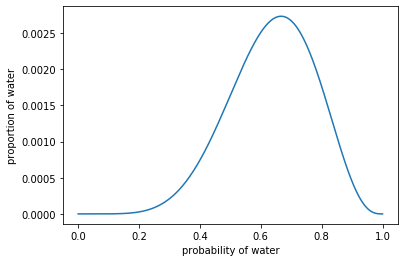

In [6]:
grid_data = posterior_grid_approx(1000, 6, 9)
#x = np.linspace(0, 1, samples.shape[0])
plt.xlabel('probability of water')
plt.ylabel('proportion of water')
plt.plot(grid_data[0], grid_data[1])

In [912]:
def posterior_grid_sample(grid_points, success, tosses, samples, prior_in=None):
    """
    """
    # define grid
    

    # define prior
    if (prior_in is None):
        prior = np.repeat(1, grid_points)  # uniform prior
        p_grid = np.linspace(0, 1, grid_points)
        #prior = np.piecewise(p_grid, [p_grid <= 0.5, p_grid > 0.5], [0, 1]) #piecewise uniform prior
        # prior = np.exp(-5 * np.abs (p_grid - 0.5))
    elif prior_in.shape[0] != grid_points: #if we have no prior or a bad prior - ideally would display an error message too!
        p_grid = np.linspace(0,1,prior_in.shape[0])
        prior = prior_in
    else:
        prior = prior_in
    # compute a likelihood at each grid value
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # normalize posterior
    posterior = unstd_posterior / unstd_posterior.sum()

    sample = np.random.choice(p_grid, p=posterior, size=samples)

    return p_grid, posterior, sample

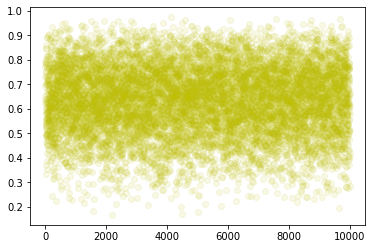

In [8]:
post_samples = posterior_grid_sample(1000, 6, 9, 10000)[2]
x = np.linspace(0, post_samples.shape[0]-1, post_samples.shape[0])
plt.plot(x, post_samples, 'yo', alpha = 0.1)
plt.show()

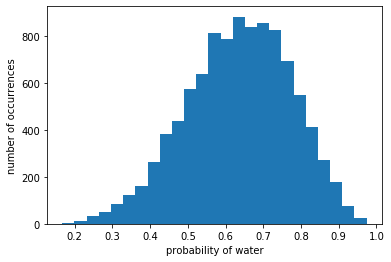

In [9]:
#this is easier than a kernel density estimate, but I should learn how to do that anyway.
plt.hist(post_samples, bins=25)
plt.xlabel('probability of water')
plt.ylabel('number of occurrences')
plt.show()

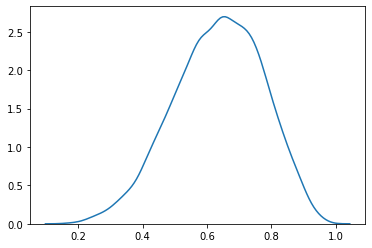

In [10]:
density_curve = sns.kdeplot(post_samples) # this generates a plot, which includes a line 

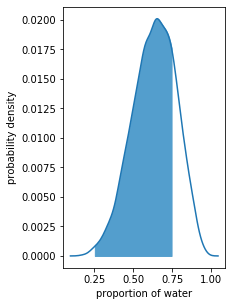

In [11]:
# this includes shading a graph in certain probability ranges

density_line = density_curve.get_lines()[-1]  # this pulls the line from the plot
density_data_x, density_data_y = density_line.get_data()
density_data_y_normalized = density_data_y / density_data_y.sum()

shade_bools = define_shade_xrange(density_data_x, 0.25, 0.75)

fig_1 = plt.figure(1, figsize=(6.4, 4.8))
chart_1 = fig_1.add_subplot(121)
chart_1.plot(density_data_x, density_data_y_normalized)
chart_1.set_ylabel('probability density')
chart_1.set_xlabel('proportion of water')
chart_1.fill_between(density_data_x, density_data_y_normalized, where=shade_bools, color='#539ecd')
plt.show()

In [12]:
shade_bools

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

In [13]:
np.array([0.25 < i < 0.5 for i in density_data_x])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

In [14]:
# here we need to shade the bottom x percent of the data

In [15]:
#R code 3.6
x = posterior_grid_approx(200, 6, 9)
posterior = x[1]
p_grid = x[0]
sum(posterior [p_grid < 0.5]) 
# p_grid < 0.5 returns a list of bools, so we're only summing the true bools in posterior

0.17186464152526157

In [16]:
#R code 3.7
x = sum(post_samples < 0.5)/post_samples.shape[0]
x

0.1746

In [17]:
#R code 3.8
x = (sum(post_samples < 0.75) - sum(0.5 > post_samples))/post_samples.shape[0]
x
# sum((post_samples > 0.5) & (post_samples < 0.75)) / 1e4 does the same thing 

0.6088

In [18]:
#R code 3.9
bottom_80 = np.percentile(post_samples, [0,80]) # bottom 80% percent
bottom_80

array([0.16716717, 0.75775776])

In [19]:
#R code 3.10
middle_80 = np.percentile(post_samples, [10, 90]) # middle 80%
middle_80

array([0.44844845, 0.80980981])

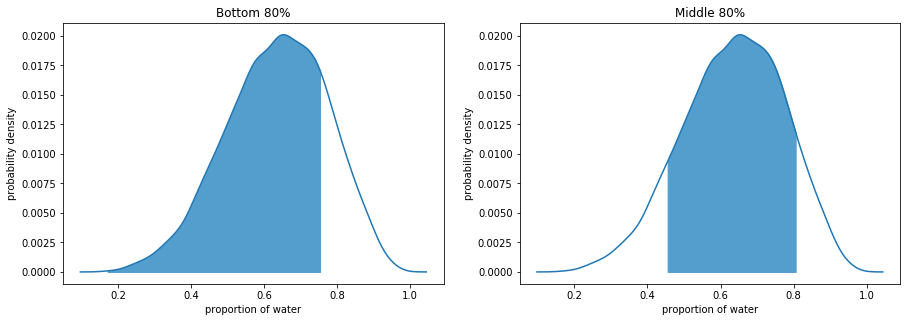

In [20]:
# Intervals of defined mass

density_line = density_curve.get_lines()[-1]  # this pulls the line from the plot
density_data_x, density_data_y = density_line.get_data()
density_data_y_normalized = density_data_y / density_data_y.sum()


fig_2 = plt.figure(2, figsize=(15, 4.8))

chart_2_to_shade = np.array([bottom_80[0] < i < bottom_80[1] for i in density_data_x])
chart_2 = fig_2.add_subplot(121)
chart_2.plot(density_data_x, density_data_y_normalized)
chart_2.set_ylabel('probability density')
chart_2.set_xlabel('proportion of water')
chart_2.fill_between(density_data_x, density_data_y_normalized, where=chart_2_to_shade, color='#539ecd')
chart_2.set_title("Bottom 80%")

chart_3_to_shade = np.array([middle_80[0] < i < middle_80[1] for i in density_data_x])
chart_3 = fig_2.add_subplot(122)
chart_3.plot(density_data_x, density_data_y_normalized)
chart_3.set_ylabel('probability density')
chart_3.set_xlabel('proportion of water')
chart_3.fill_between(density_data_x, density_data_y_normalized, where=chart_3_to_shade, color='#539ecd')
chart_3.set_title("Middle 80%")
plt.show()

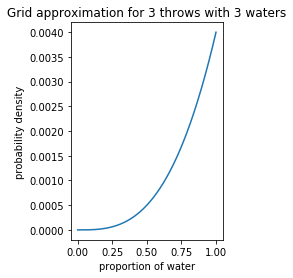

In [21]:
#R code 3.11 

x = posterior_grid_approx(1000, 3, 3)

fig_3 = plt.figure(1)
chart_4 = fig_3.add_subplot(121)
chart_4.plot(x[0], x[1])
chart_4.set_title("Grid approximation for 3 throws with 3 waters")
chart_4.set_xlabel("proportion of water")
chart_4.set_ylabel("probability density")
plt.show()

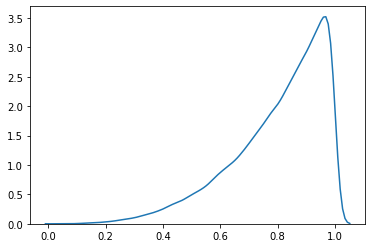

In [24]:
three_water_samples = posterior_grid_sample(1000, 3, 3, 100000)[2]
three_water_kde = sns.kdeplot(three_water_samples, kernel = 'gau')

In [25]:
arr = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])
new_arr = []
for i in arr:
    if arr[i] < 4:
        new_arr.append(arr[i])
new_arr

[2, 3, 3, 2]

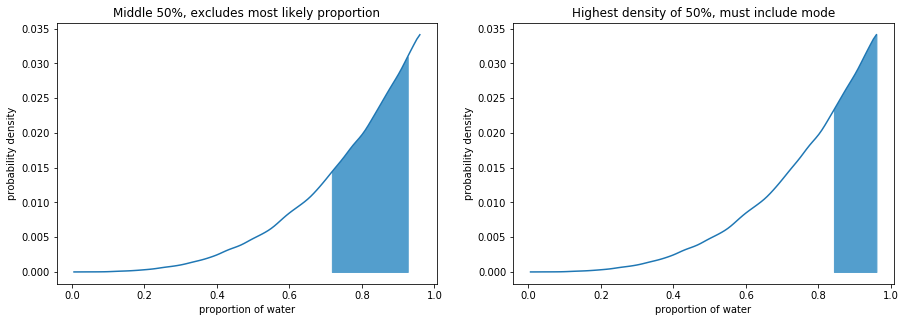

In [26]:
#figure 3.3

tw_line = three_water_kde.get_lines()[-1]  # this pulls the line from the plot
tw_x_big, tw_y_big = tw_line.get_data() #big means contains x values bigger than 1 - remove these
tw_x_list = []
tw_y_list = []

# for i in tw_x_big:
#     if i < 1:
#         tw_x_list.append(i)
#         item_index = np.where(tw_x_big==i)
#         tw_y_list.append(tw_y_big[item_index][0])

i = 1
while i < tw_x_big.shape[0]:
    if (tw_y_big[i] > tw_y_big[i - 1]) and (tw_x_big[i] < 1):
        tw_x_list.append(tw_x_big[i-1])
        tw_y_list.append(tw_y_big[i-1])
    i += 1

tw_x = np.array(tw_x_list)
tw_y = np.array(tw_y_list)

tw_y_norm = tw_y / tw_y.sum()

tw_x_list, tw_y_list

middle_50 = np.percentile(three_water_samples, [25, 75]) # middle 50%

fig_4 = plt.figure(2, figsize=(15, 4.8))

chart_5_to_shade = np.array([middle_50[0] < i < middle_50[1] for i in tw_x])
chart_5 = fig_4.add_subplot(121)
chart_5.plot(tw_x, tw_y_norm)
chart_5.set_ylabel('probability density')
chart_5.set_xlabel('proportion of water')
chart_5.fill_between(tw_x, tw_y_norm, where=chart_5_to_shade, color='#539ecd')
chart_5.set_title("Middle 50%, excludes most likely proportion")

narrowest_50 = pm.hpd(three_water_samples, alpha=0.5)

chart_6_to_shade = np.array([narrowest_50[0] < i < narrowest_50[1] for i in tw_x])
chart_6 = fig_4.add_subplot(122)
chart_6.plot(tw_x, tw_y_norm)
chart_6.set_ylabel('probability density')
chart_6.set_xlabel('proportion of water')
chart_6.fill_between(tw_x, tw_y_norm, where=chart_6_to_shade, color='#539ecd')
chart_6.set_title("Highest density of 50%, must include mode")
plt.show()

In [27]:
tw_x_list, tw_y_list

([0.006052224987553319,
  0.014417563126300752,
  0.022782901265048186,
  0.031148239403795616,
  0.03951357754254305,
  0.04787891568129049,
  0.05624425382003792,
  0.06460959195878535,
  0.07297493009753278,
  0.08134026823628022,
  0.08970560637502765,
  0.09807094451377509,
  0.10643628265252253,
  0.11480162079126996,
  0.12316695893001739,
  0.13153229706876482,
  0.13989763520751225,
  0.14826297334625968,
  0.1566283114850071,
  0.16499364962375457,
  0.173358987762502,
  0.18172432590124943,
  0.19008966403999686,
  0.1984550021787443,
  0.20682034031749172,
  0.21518567845623915,
  0.2235510165949866,
  0.23191635473373404,
  0.24028169287248147,
  0.24864703101122887,
  0.2570123691499763,
  0.2653777072887238,
  0.2737430454274712,
  0.28210838356621865,
  0.29047372170496605,
  0.2988390598437135,
  0.3072043979824609,
  0.31556973612120837,
  0.32393507425995577,
  0.3323004123987032,
  0.3406657505374507,
  0.3490310886761981,
  0.35739642681494554,
  0.3657617649536929

In [74]:
#Back to setting grid and posterior for 3 waters in 3 tosses

p_grid, posterior, samples = posterior_grid_sample(200, 3, 3, 100000)
stats.mode(samples)[0][0]
# plt.plot(p_grid, posterior)
# plt.show()

1.0

In [76]:
#R code 3.14
grid_mode = p_grid[posterior == max(posterior)]
grid_mode

array([1.])

In [75]:
#R code 3.15
stats.mode(samples)[0][0]

1.0

In [82]:
#R code 3.16
sample_mean = np.mean(samples)
sample_median = np.median(samples)

In [81]:
#R code 3.17
#finding loss: for each value in the posterior, multiply it by the absolute value of my guess minus the x-value
#so the loss will be very small if my guess is very close to the 'average' x-value

sum(posterior * abs(sample_median - p_grid))

0.12736667027883913

In [79]:
#R code 3.18
loss = [sum(posterior * abs(p - p_grid)) for p in p_grid]
# the above line returns an array. Each element in the array tells me how much I'd lose if I made a 
# guess corresponding with p_grid values.
# for each given p_grid value, sum values of the posterior proportional to their distance away 
# from my guess. So if I guess 0.7, posterior values close to my guess hurt me a lot, and ones far away don't.

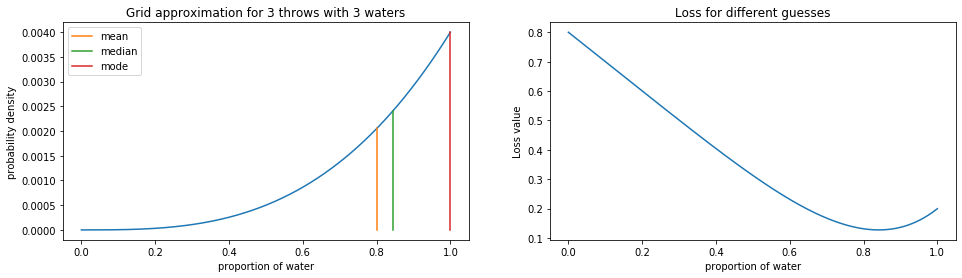

In [80]:
#Figure 3.4

p_grid, posterior = posterior_grid_approx(1000, 3, 3)

fig_5 = plt.figure(1, figsize=(16,4))
chart_7 = fig_5.add_subplot(121)
chart_7.plot(p_grid, posterior)
chart_7.set_title("Grid approximation for 3 throws with 3 waters")
chart_7.set_xlabel("proportion of water")
chart_7.set_ylabel("probability density")
chart_7.plot((sample_mean, sample_mean), (0, match_x_y(p_grid, posterior, sample_mean)), label = 'mean')
chart_7.plot((sample_median, sample_median), (0, match_x_y(p_grid, posterior, sample_median)), label='median')
chart_7.plot((grid_mode, grid_mode), (0, match_x_y(p_grid, posterior, grid_mode)), label = 'mode')
chart_7.legend()

chart_8 = fig_5.add_subplot(122)
chart_8.plot(p_grid, loss)
chart_8.set_title("Loss for different guesses")
chart_8.set_xlabel("proportion of water")
chart_8.set_ylabel("Loss value")


plt.show()

In [83]:
#R code 3.19
p_grid[loss==min(loss)][0] #give me the x-coordinate (p_grid) when the loss is at its smallest

0.8408408408408409

In [84]:
#R code 3.20
likelihoods = stats.binom.pmf([0, 1, 2], 2, 0.7) #range(3) also works for [0, 1, 2]
likelihoods

array([0.09, 0.42, 0.49])

In [85]:
#R code 3.21
stats.binom.rvs(n=2, p=0.7, size=1)

array([2])

In [86]:
#R code 3.22
dummy_data = stats.binom.rvs(n=2, p=0.7, size=10)
dummy_data

array([2, 0, 2, 1, 1, 2, 2, 0, 1, 2])

In [87]:
#R code 3.23
dummy_data = stats.binom.rvs(n=2, p=0.7, size=100000)
[(dummy_data == i).mean() for i in range(3)]

#create a list of means for each value of i in range(3)

[0.09, 0.41987, 0.49013]

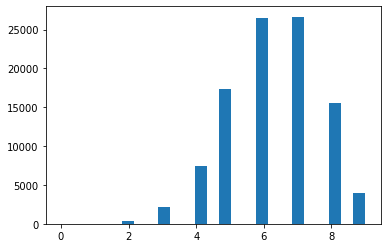

In [88]:
#R code 3.24
dummy_data = stats.binom.rvs(n=9, p=0.7, size=100000)
plt.hist(dummy_data, bins = 25)
plt.show()

In [89]:
#R code 3.25
w = stats.binom.rvs(n=9, p=0.6, size=10000)

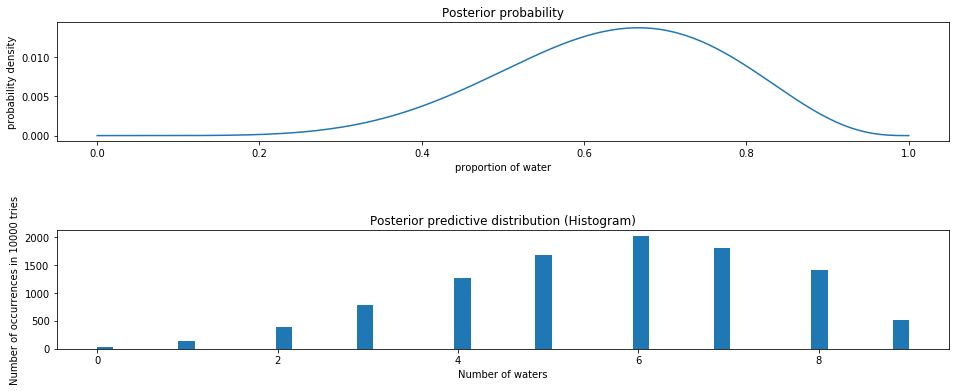

In [112]:
#R code 3.26, figure 3.6
p_grid, posterior, samples = posterior_grid_sample(200, 6, 9, 10000)
# w = stats.binom.rvs(n=9, p=samples, size=samples.shape[0]) # line below does the same thing and is cleaner
w = stats.binom.rvs(n=9, p=samples)
#plt.hist(w, bins = 50)
#plt.show()
fig_6 = plt.figure(1, figsize=(16,6))
chart_9 = fig_6.add_subplot(211)
chart_9.plot(p_grid, posterior)
chart_9.set_title("Posterior probability")
chart_9.set_xlabel("proportion of water")
chart_9.set_ylabel("probability density")

chart_10 = fig_6.add_subplot(212)
#sns.kdeplot(w, ax=chart_10, kernel = 'gau', bw = '0.6', gridsize=10000 )
#chart_10.set_title("Posterior predictive distribution (KDE)")
#chart_10.set_ylabel("probability density")

chart_10.set_title("Posterior predictive distribution (Histogram)")
chart_10.set_ylabel(f"Number of occurrences in {samples.shape[0]} tries")
chart_10.hist(w, bins=50)
chart_10.set_xlabel("Number of waters")


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.75)
plt.show()

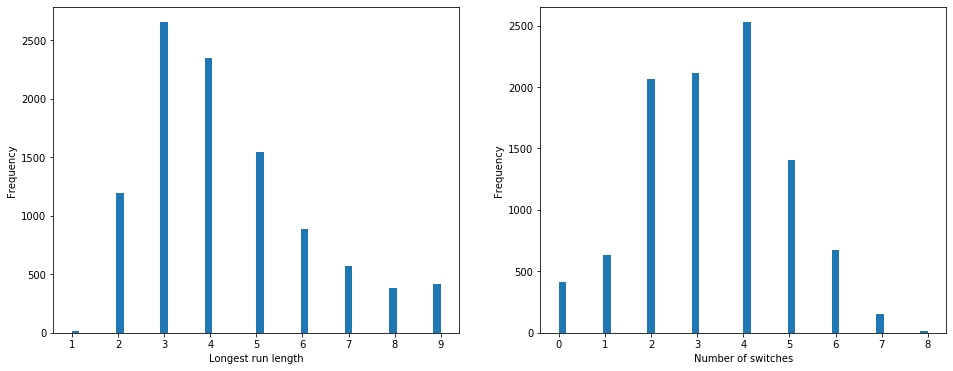

In [168]:
#figure 3.7

number_tosses = 9
number_samples = 10000
all_data = []
j=0
while j<number_samples:
    results = []
    i=0
    while i < number_tosses:
        results.append(stats.binom.rvs(1, 0.7))
        i+=1
    all_data.append(results)
    j+=1
len(all_data)

max_streak_count = []
max_flip_count = []

for d in all_data:
    max_streak_count.append(find_longest_streak(d))
    max_flip_count.append(calculate_flips(d))
    
#max_streak_count, max_flip_count
fig_7 = plt.figure(1, figsize=(16,6))
chart_11 = fig_7.add_subplot(121)
chart_11.hist(max_streak_count, bins=50)
chart_11.set_xlabel("Longest run length")
chart_11.set_ylabel("Frequency")

chart_12 = fig_7.add_subplot(122)
chart_12.set_ylabel('Frequency')
bins = chart_12.hist(max_flip_count, bins=50)[1]
chart_12.set_xlabel("Number of switches")
plt.show()

In [731]:
#Easy problems
x = 0
while x!=0.0005:    # this is to get a similar random sampling to the book
    
    p_grid, posterior, samples = posterior_grid_sample(1000, 6, 9, 10000)
    #3E1
    x = sum(samples<0.2)/len(samples)

x

0.0005

In [737]:
#3E2
#len(samples[samples > 0.8])/len(samples), (samples>0.8).mean() #same thing
sum(samples>0.8)/len(samples)

0.116

In [738]:
#3E3
(sum(samples > 0.2) - sum(samples > 0.8))/len(samples)

0.8835

In [739]:
#3E4
np.percentile(samples, 20)

0.5145145145145145

In [295]:
#3E5
np.percentile(samples, 80)

0.7583791895947973

In [740]:
#3E6
narrowest_66 = pm.hpd(samples, alpha=0.33)
narrowest_66

array([0.51551552, 0.79279279])

In [299]:
#3E7
middle_66 = np.percentile(samples, [16.7, 83.3])
middle_66

array([0.50375188, 0.77438719])

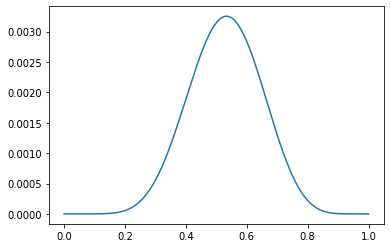

In [760]:
#3M1
p_grid, posterior_815, samples_815 = posterior_grid_sample(1000, 8, 15, 10000)
plt.plot(p_grid, posterior_815)

In [762]:
p_grid[np.where(posterior_815 == np.amax(posterior_815))]

array([0.53353353])

In [899]:
#3M2
narrowest_90 = pm.hpd(samples_815, alpha=0.1) #I don't understand why to use 0.1 instead of 0.9 if I want 90%, but OK
narrowest_90
#print(np.median(samples))

array([0.32732733, 0.71071071])

In [901]:
#3M3
ppc = stats.binom.rvs(n=15, p=samples_815)
(ppc==8).mean()

0.1508

In [875]:
#3M4
p_grid = np.linspace(0,1,posterior_815.shape[0])
likelihood = stats.binom.pmf(6, 9, p_grid)
y = sum(posterior_815*likelihood)
y

0.17638982366401898

In [902]:
#3M4 - double check
dummy = stats.binom.rvs(n=9, p=samples_815)
(dummy==6).mean()

0.1755

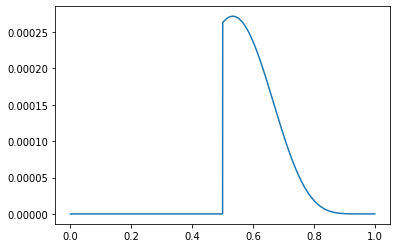

In [888]:
#3M5
#part 1
p_grid, posterior_piecewise, samples_piecewise = posterior_grid_sample(20000, 8, 15, 20000)
plt.plot(p_grid, posterior_piecewise)

In [889]:
#3M5 - part 2
narrowest_90 = pm.hpd(samples_piecewise, alpha=0.10) #I don't understand why to use 0.1 instead of 0.9 if I want 90%, but OK
narrowest_90

array([0.500025  , 0.71288564])

In [903]:
#3M5 - part 3
ppc = stats.binom.rvs(n=15, p=samples_piecewise)
(ppc==8).mean()

0.15455

In [905]:
#3M5 - part 4
p_grid = np.linspace(0,1,posterior_piecewise.shape[0])
likelihood_piecewise = stats.binom.pmf(6, 9, p_grid)
y = sum(posterior_piecewise*likelihood_piecewise)
y

0.23230694742778618

In [906]:
#3M5 - part 4 - double check
dummy = stats.binom.rvs(n=9, p=samples_piecewise)
(dummy==6).mean()

0.23235

In [392]:
#3M5 - checking with true value p = 0.7
ppc = stats.binom.rvs(n=9, p=0.7, size=20000)
(ppc==6).mean()

# the conclusion here is that improving the prior brought the probability of getting 6 in 9 based on 8 in 15
# closer to the "true" value. With the flat prior, p = 0.17. With the piecewise prior, p = 0.23. True p = 0.26.

0.2621

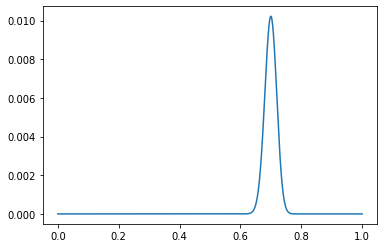

In [443]:
#3M6
# I'm not sure how to do this other than guessing and checking, but let's go.
# Let's assume a flat prior. Let's also assume that we get a good representation of successful waters, p=0.7.

trials = 550
waters = round(trials*0.7)
p_grid, posterior, samples = posterior_grid_sample(2000, waters, trials, 20000)
middle_99 = np.percentile(samples, [10, 90]) # middle 99%
interval = middle_99[1]-middle_99[0]
interval
plt.plot(p_grid, posterior)

#550 times?

In [444]:
#R code 3.28, 3.30

birth_1 = [1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,
           1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1]
birth_2 = [0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0, 1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0]

total_boys = sum(birth_1)+sum(birth_2)
total_boys

111

In [926]:
#3H1

p_grid, posterior, samples = posterior_grid_sample(2000, sum(birth_1)+sum(birth_2), len(birth_1)+len(birth_2), 10000)
#plt.plot(p_grid, posterior)
#samples.mean(), np.median(samples), stats.mode(samples)
p_grid[np.where(posterior == np.amax(posterior))]
#looks like the max value is around 55%

array([0.55477739])

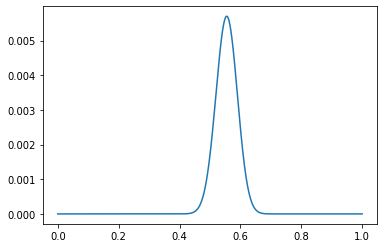

In [937]:
plt.plot(p_grid, posterior)

In [927]:
#3H2
l = pm.hpd(samples, alpha=0.50) 
m = pm.hpd(samples, alpha=0.11)
n = pm.hpd(samples, alpha=0.03)
l, m, n

(array([0.52726363, 0.57428714]),
 array([0.49874937, 0.6098049 ]),
 array([0.47773887, 0.62831416]))

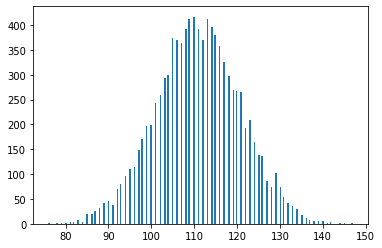

In [938]:
#3H3
sim_births = stats.binom.rvs(n=200, p=samples)
plt.hist(sim_births, bins = 200)
plt.show()

#yes, it looks like 110 is the middle, most likely outcome, or at least very close.

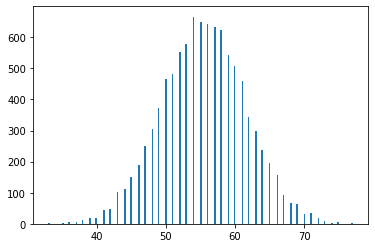

In [950]:
#3H4
sum(birth_1) #51

p_grid, posterior_firsts, samples_firsts = posterior_grid_sample(2000, sum(birth_1), len(birth_1), 10000)
p_grid[np.where(posterior_firsts == np.amax(posterior_firsts))]
#looks like the max value is around 51%

sim_births_firsts = stats.binom.rvs(n=100, p=samples)
plt.hist(sim_births_firsts, bins = 200)
plt.show()

#model overestimates the data

In [954]:
#3H5
boy_after_girl = 0
first_girls = len(birth_1) - sum(birth_1)
i=0
while i<len(birth_1)-1:
    if birth_1[i] == 0:
        if birth_2[i] == 1:
            boy_after_girl += 1
    i += 1
f'{boy_after_girl} boys after {first_girls} girls'

#it seems like boys are more likely to follow girls

'39 boys after 49 girls'

In [962]:
i=0
g_g = 0
while i<len(birth_1)-1:
    if birth_1[i] == 0 and birth_2[i] == 0:
        g_g += 1
    i += 1
    
g_g

10

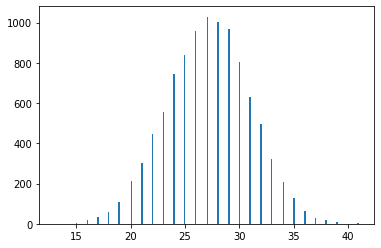

In [963]:
#3H5
sum(birth_1) #51

#p_grid, posterior_g_b, samples_firsts = posterior_grid_sample(2000, sum(birth_1), len(birth_1), 10000)
#p_grid[np.where(posterior_firsts == np.amax(posterior_firsts))]
#looks like the max value is around 51%

sim_births_girls = stats.binom.rvs(n=49, p=samples)
plt.hist(sim_births_girls, bins = 200)
plt.show()